In [1]:
from transformers import CLIPImageProcessor, CLIPTextModel, CLIPTokenizer, CLIPVisionModelWithProjection
import torch
from diffusers.models import AutoencoderKL, ImageProjection, UNet2DConditionModel
from diffusers import DDIMScheduler
import matplotlib.pyplot as plt
from peft import LoraConfig
from peft.utils import get_peft_model_state_dict

/root/miniconda3/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/root/miniconda3/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
from inplace_abn import InPlaceABN

ImportError: /root/miniconda3/lib/python3.8/site-packages/inplace_abn/_backend.cpython-38-x86_64-linux-gnu.so: undefined symbol: _ZN2at4_ops5zeros4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEE

In [2]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [3]:
unet_lora_config = LoraConfig(
        r=8,
        lora_alpha=8,
        init_lora_weights="gaussian",
        target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    )


In [4]:
tokenizer = CLIPTokenizer.from_pretrained("Intel/ldm3d-pano",subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained("Intel/ldm3d-pano",subfolder="text_encoder")
vae = AutoencoderKL.from_pretrained("Intel/ldm3d-pano",subfolder="vae")
unet = UNet2DConditionModel.from_pretrained("Intel/ldm3d-pano",subfolder="unet")
scheduler = DDIMScheduler.from_pretrained("Intel/ldm3d-pano",subfolder="scheduler") 
unet.requires_grad_(False)
vae.requires_grad_(False)
text_encoder.requires_grad_(False)



CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

In [5]:
unet.add_adapter(unet_lora_config)
unet.enable_xformers_memory_efficient_attention()

In [6]:
import sys
sys.path.append("/root/autodl-tmp/taming-transformers/")
from taming.data.dtu import DTUDataset
train_data = DTUDataset("/root/autodl-tmp/mvs_training/dtu/",split = "train")

/root/miniconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/root/miniconda3/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


scan scan2 mean output: [1.00121434 0.97192338 0.96325176 0.9620754  0.96730371 0.97451435
 0.98707856]
scan scan6 mean output: [1.11856514 1.0349555  1.01148678 1.00809412 1.00456903 1.02157744
 1.05318288]
scan scan7 mean output: [2.80176354 2.98415808 3.08893367 3.06841932 3.10951912 3.1721381
 2.96063437]
scan scan8 mean output: [1.19103727 1.09251997 1.09845439 1.09647759 1.16365631 1.21807814
 1.26017903]
scan scan14 mean output: [1.97682371 1.88708503 1.85337303 1.86532249 1.89953903 2.03141878
 2.11037798]
scan scan16 mean output: [3.1915682  3.25915756 3.22970628 3.21195235 3.26540529 3.16314249
 3.15736253]
scan scan18 mean output: [2.05124783 2.013102   1.9762233  1.97305491 1.94199959 1.96142664
 2.00164497]
scan scan19 mean output: [1.42494544 1.44790176 1.42633028 1.43245512 1.41559309 1.43743257
 1.49461799]
scan scan20 mean output: [2.16098818 2.17821048 2.15450914 2.14886178 2.14548533 2.15932194
 2.23102642]
scan scan22 mean output: [1.84457468 1.76052218 1.72700193 1

In [ ]:
from diffusers import StableDiffusionLDM3DPipeline

pipe = StableDiffusionLDM3DPipeline.from_pretrained("Intel/ldm3d-pano")

# On CPU


# On GPU
pipe.to("cuda")

prompt = "A house"
name = "lemons"

In [97]:
pipe

StableDiffusionLDM3DPipeline {
  "_class_name": "StableDiffusionLDM3DPipeline",
  "_diffusers_version": "0.26.3",
  "_name_or_path": "Intel/ldm3d-pano",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [96]:




prompt = "A house"
name = "lemons"

output = pipe(prompt)
rgb_image, depth_image = output.rgb, output.depth
rgb_image[0].save(name+"_ldm3d_rgb.jpg")
depth_image[0].save(name+"_ldm3d_depth.png")


KeyboardInterrupt: 

In [19]:
from einops import rearrange
from torchvision import transforms as T
unpreprocess = T.Compose([
    T.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
    T.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    
])

def encode_imgs(imgs,img_encoder,depths):
    b,v,c,h,w = imgs.shape
    imgs = rearrange(imgs,"b v c h w -> b c h (v w)")
    mi = depths.min()
    ma = depths.max()
    depths = (depths-mi)/(ma-mi+1e-8)
    
    depths = depths*2-1
    # imgs = unpreprocess(imgs)
    
    # imgs = imgs*2-1
    depths = depths.repeat(1,1,1,3)
    print(imgs.shape,depths.shape)
    imgs = torch.cat([imgs,depths],dim=1)
    imgs = imgs.to(img_encoder.device)
    image_embeds = img_encoder.tiled_encode(imgs)
    mean = image_embeds.latent_dist.mean
    std = image_embeds.latent_dist.std
    # reparameter
    alpha = torch.randn_like(mean)
    z = mean + std*alpha
    
    return z
def decode_imgs(latents,vae,v):
    b,c,h,vw = latents.shape
   
    image = vae.decode(latents #/vae.config.scaling_factor
                       ,
                       return_dict=False)[0]
    imgs = rearrange(image,"b c h (v w) -> b v c h w",v=v)
    return imgs


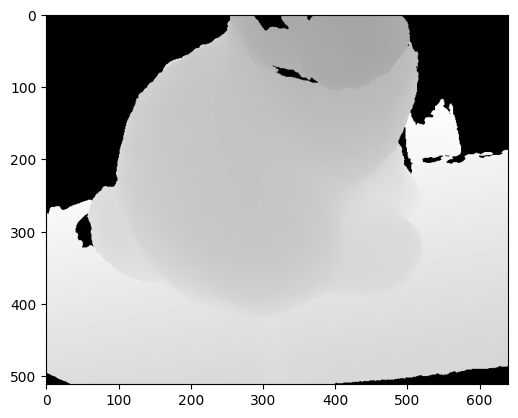

torch.Size([1, 3, 512, 1920]) torch.Size([1, 1, 512, 1920])
torch.Size([1, 4, 64, 240])


In [20]:
imgs = train_data[0]["imgs"].unsqueeze(0)
depths = train_data[0]["depths"]["level_0"].unsqueeze(0).unsqueeze(1)
mi = depths.min()
ma = depths.max()
depth = (depths-mi)/(ma-mi+1e-8) 
plt.imshow(depth[0,0],cmap='gray')
plt.show()
vae = vae.cuda()
with torch.no_grad():
    latents = encode_imgs(imgs,vae,depths)
    
    print(latents.shape)
    imgs = decode_imgs(latents,vae,3)
    
    
    

tensor(-0.1094, device='cuda:0') tensor(1.1173, device='cuda:0')


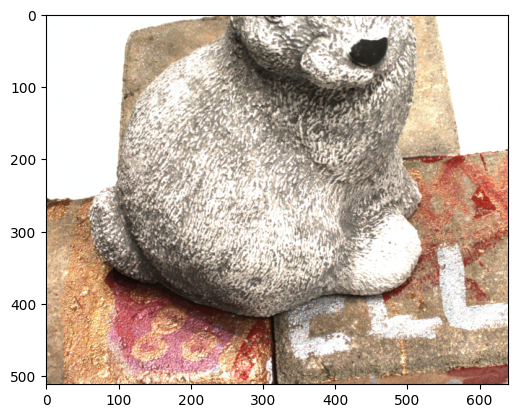

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 640])


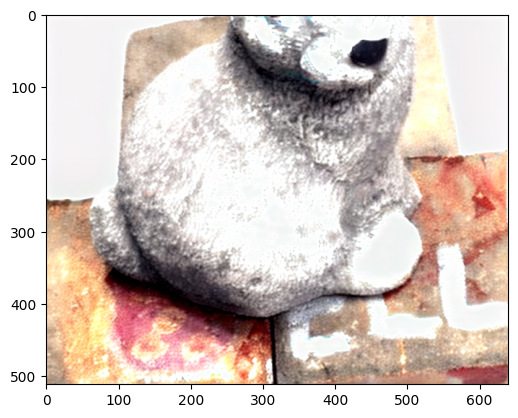

torch.Size([512, 640])


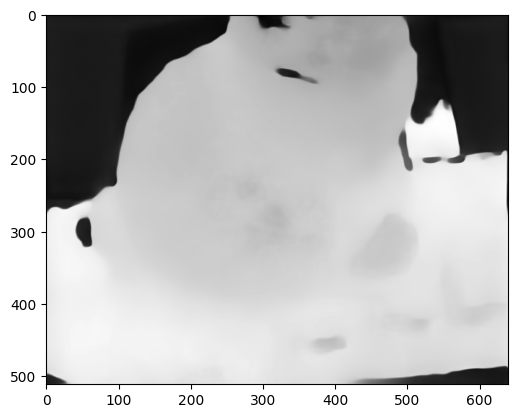

In [21]:
import matplotlib.pyplot as plt

img = imgs[0,0,:3]
img = 0.5*img+0.5
print(img.min(),img.max())
plt.imshow(unpreprocess(train_data[0]["imgs"][0]).permute(1,2,0).cpu().numpy())
plt.show()
print(img.shape)
plt.imshow(img.permute(1,2,0).cpu().numpy())
plt.show()
print(imgs[0,0,3].shape)
plt.imshow(imgs[0,[0],3].permute(1,2,0).cpu().numpy(),cmap = 'gray')
plt.show()

In [22]:
def encode_prompt(prompt, text_model, tokenizer):
    text_inputs = tokenizer(
                prompt,
                padding="max_length",
                max_length=tokenizer.model_max_length,
                truncation=True,
                return_tensors="pt",
            )
    text_input_ids = text_inputs.input_ids
    text_features = text_model(text_input_ids)
    
    text_features = text_features[0]
    
    return text_features

In [23]:
prompt_embedding = encode_prompt(["A bedroom"], text_encoder, tokenizer)

In [24]:
scheduler.set_timesteps(50, device="cuda")
timesteps = scheduler.timesteps
timesteps

tensor([981, 961, 941, 921, 901, 881, 861, 841, 821, 801, 781, 761, 741, 721,
        701, 681, 661, 641, 621, 601, 581, 561, 541, 521, 501, 481, 461, 441,
        421, 401, 381, 361, 341, 321, 301, 281, 261, 241, 221, 201, 181, 161,
        141, 121, 101,  81,  61,  41,  21,   1], device='cuda:0')

In [25]:
unpreprocess = T.Compose([
    T.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
    T.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    
])

In [26]:
def rescale_noise_cfg(noise_cfg, noise_pred_text, guidance_rescale=0.4):
    """
    Rescale `noise_cfg` according to `guidance_rescale`. Based on findings of [Common Diffusion Noise Schedules and
    Sample Steps are Flawed](https://arxiv.org/pdf/2305.08891.pdf). See Section 3.4
    """
    std_text = noise_pred_text.std(dim=list(range(1, noise_pred_text.ndim)), keepdim=True)
    std_cfg = noise_cfg.std(dim=list(range(1, noise_cfg.ndim)), keepdim=True)
    # rescale the results from guidance (fixes overexposure)
    noise_pred_rescaled = noise_cfg * (std_text / std_cfg)
    # mix with the original results from guidance by factor guidance_rescale to avoid "plain looking" images
    noise_cfg = guidance_rescale * noise_pred_rescaled + (1 - guidance_rescale) * noise_cfg
    return noise_cfg

In [46]:
from PIL import Image
bed_img = Image.open("lemons_ldm3d_rgb.jpg")
from torchvision import transforms as T
preprocess = T.Compose([
   
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    
])
bed_img = preprocess(bed_img).unsqueeze(0).to("cuda")

depth = Image.open("lemons_ldm3d_depth.png")
depth = T.Compose([
    T.ToTensor(),
    
])(depth).unsqueeze(0).to("cuda")
bed_depth = (depth-depth.min())/(depth.max()-depth.min())
bed_depth = bed_depth*2-1



In [47]:
bed_img.shape,bed_depth.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 1, 512, 512]))

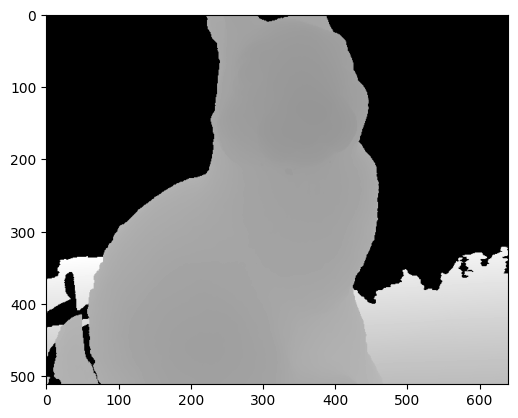

torch.Size([1, 3, 3, 512, 640]) torch.Size([1, 1, 512, 640])


ValueError: not enough values to unpack (expected 5, got 4)

In [44]:
# imgs = train_data[102]["imgs"].unsqueeze(0)
# depths = train_data[102]["depths"]["level_0"].unsqueeze(0).unsqueeze(1)
# mi = depths.min()
# ma = depths.max()
# depth = (depths-mi)/(ma-mi+1e-8) 
# plt.imshow(depth[0,0],cmap='gray')
# plt.show()
# vae = vae.cuda()
# with torch.no_grad():
#     print(imgs.shape,depth.shape)
#     latents = encode_imgs(bed_img,vae,bed_depth)
    
# latents=latents[:,:,:,:80]

torch.Size([1, 4, 512, 512])


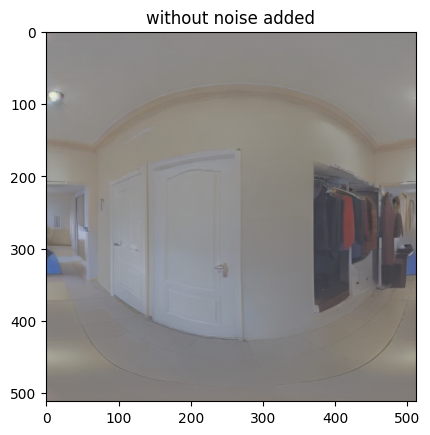

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


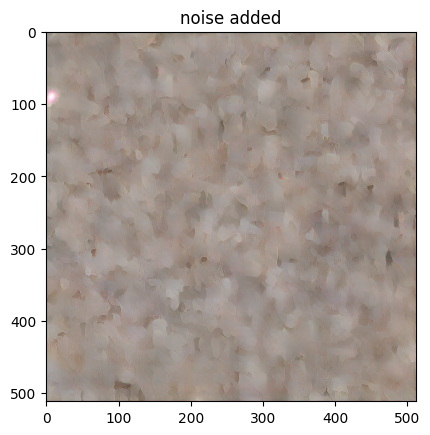

100%|██████████| 50/50 [00:02<00:00, 21.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


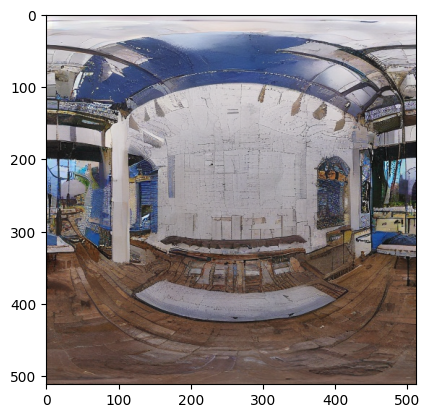

In [86]:
encoded = torch.cat([bed_img*0.25,bed_depth],dim=1)
print(encoded.shape)
latents = vae.encode(encoded).latent_dist.mean
with torch.no_grad():
   
    image = vae.decode(latents#/vae.config.scaling_factor 
                       , return_dict=False)[0]
    image = image*0.5+0.5
plt.imshow(image[0,:3].permute(1,2,0).cpu().numpy())
save_image(image[0,:3],"test1.jpg")
save_image(image[0,3:],"bed_depth.jpg")
plt.title("without noise added")
plt.show()


unet = unet.to("cuda")
scheduler.set_timesteps(50, device="cuda")
timesteps = scheduler.timesteps
starts = 999
noise = torch.randn(1, 4, 64,64).cuda()

latents =scheduler.add_noise(latents, noise, torch.tensor([starts]).cuda())

image = vae.decode(latents#/vae.config.scaling_factor 
                       , return_dict=False)[0]
image = image*0.5+0.5

plt.imshow(image[0,:3].permute(1,2,0).cpu().numpy())
plt.title("noise added")
plt.show()

prompt_embedding = encode_prompt([#"",
                                  "A house"], text_encoder, tokenizer)
latents =  torch.randn(1, 4, 64, 64).cuda()
with torch.no_grad():
    from tqdm import tqdm
    for t in tqdm(timesteps[timesteps<starts]):
       
        latents_input = torch.cat([latents]
                                  #*2
                                 )
        
        latents_input = scheduler.scale_model_input(latents_input, t)
        
        noise_pred = unet(latents_input,t, encoder_hidden_states=prompt_embedding.cuda())[0]
        #denoise_uncond,denoise_cond = noise_pred.chunk(2)
        #noise_pred = denoise_uncond+0.9*(denoise_cond-denoise_uncond)
        #rescale_noise_cfg(noise_pred,denoise_cond,0.0)
        latents =scheduler.step(noise_pred, t, latents, return_dict=False)[0]
   
    image = vae.decode(latents/vae.config.scaling_factor 
                       , return_dict=False)[0]
image = image*0.5+0.5
from torchvision.utils import save_image
save_image(image[0,:3],"test2.jpg")
plt.imshow(image[0,:3].permute(1,2,0).cpu().numpy())




In [28]:
prompt_embeds = 

SyntaxError: invalid syntax (634781866.py, line 1)